In [1]:
import pandas as pd
df = pd.read_csv('sales forecasting.csv')
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [3]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


In [5]:
import pandas as pd

# Read and parse 'Order Date' as datetime, set it as index
df = pd.read_csv("sales forecasting.csv", parse_dates=["Order Date"], index_col="Order Date")

# Optional: sort by date just in case
df = df.sort_index()

# Show basic info
print(df[['Sales']].head())

              Sales
Order Date         
01/01/2018  474.430
01/01/2018    3.600
01/01/2018  454.560
01/01/2018  141.420
01/01/2018  310.744


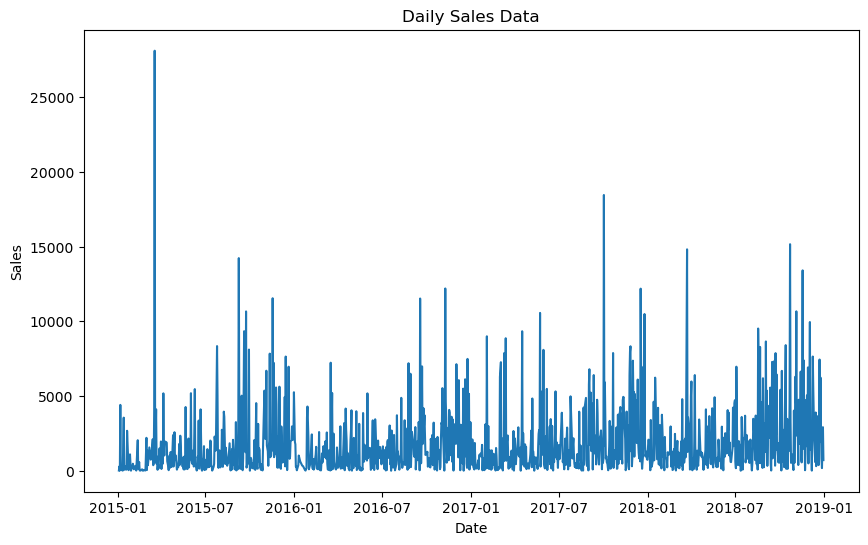

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1230
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11230.551
Date:                Mon, 12 May 2025   AIC                          22467.102
Time:                        10:08:07   BIC                          22482.444
Sample:                             0   HQIC                         22472.875
                               - 1230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0392      0.029      1.344      0.179      -0.018       0.096
ma.L1         -0.9674      0.008   -123.855      0.000      -0.983      -0.952
sigma2      5.058e+06   6.34e+04     79.794      0.0

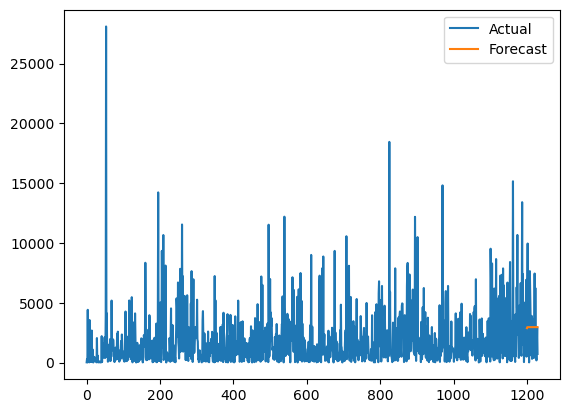

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv('sales forecasting.csv')
#Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
#Group sales by Order Date and sum
df_daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
#Plot original sales data
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales['Order Date'], df_daily_sales['Sales'])
plt.title('Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
#ARIMA Model
model = ARIMA(df_daily_sales['Sales'], order=(1,1,1))
model_fit = model.fit()
#Print summary
print(model_fit.summary())
#Forecast
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
#Plot forecast
plt.plot(df_daily_sales['Sales'], label='Actual')
plt.plot([None]*(len(df_daily_sales['Sales'])-forecast_steps) + list(forecast), label='Forecast')
plt.legend()
plt.show()

C:\Users\pilla\AppData\Local\Temp\ipykernel_17948\4236100171.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


ARIMA RMSE: 27715.35
ARIMA MAPE: 57.79%


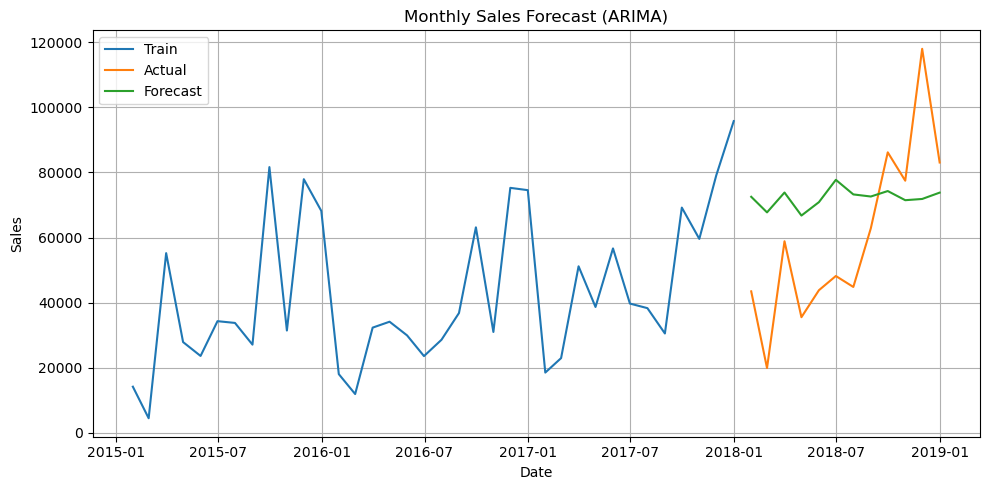

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Load and parse the date with day-first format
df = pd.read_csv('sales forecasting.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
# Group by month and sum sales
df.set_index('Order Date', inplace=True)
monthly_sales = df['Sales'].resample('M').sum()
# Train/test split
train = monthly_sales[:-12]
test = monthly_sales[-12:]
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
# Forecast
forecast = model_fit.forecast(steps=12)
forecast.index = test.index
# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)
print(f'ARIMA RMSE: {rmse:.2f}')
print(f'ARIMA MAPE: {mape:.2%}')
# Plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Monthly Sales Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()